# ID5030 Assignment-3

### Name : Uttkarsh Jain 
### Roll no : ME19B182

# Importing required libraries

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import torch

# Reading Dataset 

In [270]:
#Reading the dataset 
df = pd.read_excel('Concrete_Data.xls')

In [271]:
#head function shows the first five columns of the dataframe
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [272]:
#Finding no of data points in the dataframe
df.shape

(1030, 9)

In [273]:
#getting the actual values of columns
df.columns 

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

# Creating and splitting dataset into training and testing sets 

In [274]:
#creating X data matrix and y as our target variable 
X = df.drop('Concrete compressive strength(MPa, megapascals) ',axis = 1)
y = df['Concrete compressive strength(MPa, megapascals) ']

In [275]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [276]:
#verifying if the split is correct
X_train.shape,y_train.shape

((721, 8), (721,))

## Normalizing the dataset

In [277]:
X_train_norm = (X_train - np.mean(X_train,axis = 0))/np.std(X_train,axis = 0)
X_test_norm = (X_test - np.mean(X_train,axis = 0))/np.std(X_train,axis = 0)

In [278]:
X_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
196,194.68,0.0,100.52,165.62,7.48,1006.4,905.9,28
631,325.00,0.0,0.00,184.00,0.00,1063.0,783.0,7
81,318.80,212.5,0.00,155.70,14.30,852.1,880.4,3
526,359.00,19.0,141.00,154.00,10.91,942.0,801.0,3
830,162.00,190.0,148.00,179.00,19.00,838.0,741.0,28


In [279]:
X_train_norm.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
196,-0.828635,-0.855292,0.762033,-0.765446,0.224201,0.415550,1.676831,-0.292980
631,0.374843,-0.855292,-0.816902,0.103778,-1.013764,1.136985,0.141922,-0.633845
81,0.317587,1.568944,-0.816902,-1.234582,1.352934,-1.551189,1.358359,-0.698772
526,0.688826,-0.638537,1.397879,-1.314978,0.791878,-0.405305,0.366726,-0.698772
830,-1.130428,1.312260,1.507833,-0.132681,2.130800,-1.730910,-0.382619,-0.292980


# Varients of Gradient descent

In [280]:
def gradJ(W,X,Y):
    """
    Calculates gradient of squared error vector wrt to weights
    """
    m = X.shape[0]
    grad_J= (X.T@(X@W-Y))*(1/m)
    return grad_J

def mse_error(W,X,Y):
    """
    Calculates mean squared error between predicted vector Y and true Y .
    """
    m = X.shape[0]
    #print(np.linalg.norm(Y-X@W))
    error = np.sum(np.square(Y-X@W))*(1/m)
    return error

def r2score(W,X,Y):
    X = X.copy()
    X['bias'] = np.ones(X.shape[0])
    y_pred = np.array(X)@np.array(W)
    return r2_score(Y,y_pred)

## Batch Gradient Descent

In [282]:
def batch_grad(X,Y, alpha = 1e-5,max_iter = 10000):
    """
    This function implements Batch gradient descent assuming least squared cost function
    X : training data matrix with shape(n_samples,n_features), can be either dataframe or numpy array
    Y : training data labels with shape(n_samples,1)  
    alpha : learning rate , by default value is 1e-5
    max_iter : maximum no of iteration , by default value is 10000
    """
    n_samples = X.shape[0]
    X = X.copy()
    X['bias'] = np.ones(n_samples)
    n_features = X.shape[1]
    W_old = np.zeros((n_features,1))
    W_new = W_old
    mse = []
    iterations = 0
    while (iterations<max_iter):
        W_old = W_new
        del_w = alpha*gradJ(W_old,X,Y)
        W_new = W_old-del_w
        error = mse_error(W_new,X,Y)
        mse.append(error)
        if iterations%5000==0:
            print('iterations = ',iterations,' training error = ',mse[-1][0])
        iterations+=1
    plt.figure(figsize=(6,6))
    plt.plot(np.arange(len(mse)),mse,'-')
    
    return W_new

### Without data normalization

iterations =  0  training error =  3627053578.096343


/Users/uttkarshjain/tensorflow-test/env/lib/python3.8/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/uttkarshjain/tensorflow-test/env/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in square
  result = func(self.values, **kwargs)


iterations =  5000  training error =  0.0
iterations =  10000  training error =  0.0
iterations =  15000  training error =  0.0
iterations =  20000  training error =  0.0
iterations =  25000  training error =  0.0
iterations =  30000  training error =  0.0
iterations =  35000  training error =  0.0
iterations =  40000  training error =  0.0
iterations =  45000  training error =  0.0


,0
Cement (component 1)(kg in a m^3 mixture),NaN
Blast Furnace Slag (component 2)(kg in a m^3 mixture),NaN
Fly Ash (component 3)(kg in a m^3 mixture),NaN
Water (component 4)(kg in a m^3 mixture),NaN
Superplasticizer (component 5)(kg in a m^3 mixture),NaN
Coarse Aggregate (component 6)(kg in a m^3 mixture),NaN
Fine Aggregate (component 7)(kg in a m^3 mixture),NaN
Age (day),NaN
bias,NaN


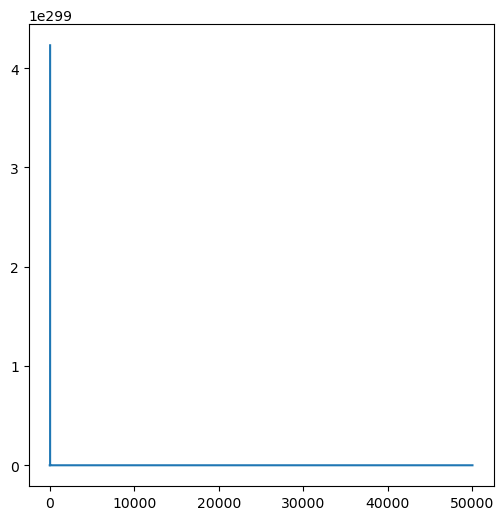

In [284]:
batch_grad(X_train,np.array(y_train).reshape(721,1),alpha=1e-3,max_iter = 50000)

iterations =  0  training error =  35880952.858488776


/Users/uttkarshjain/tensorflow-test/env/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in square
  result = func(self.values, **kwargs)


iterations =  5000  training error =  0.0
iterations =  10000  training error =  0.0
iterations =  15000  training error =  0.0
iterations =  20000  training error =  0.0
iterations =  25000  training error =  0.0
iterations =  30000  training error =  0.0
iterations =  35000  training error =  0.0
iterations =  40000  training error =  0.0
iterations =  45000  training error =  0.0


,0
Cement (component 1)(kg in a m^3 mixture),NaN
Blast Furnace Slag (component 2)(kg in a m^3 mixture),NaN
Fly Ash (component 3)(kg in a m^3 mixture),NaN
Water (component 4)(kg in a m^3 mixture),NaN
Superplasticizer (component 5)(kg in a m^3 mixture),NaN
Coarse Aggregate (component 6)(kg in a m^3 mixture),NaN
Fine Aggregate (component 7)(kg in a m^3 mixture),NaN
Age (day),NaN
bias,NaN


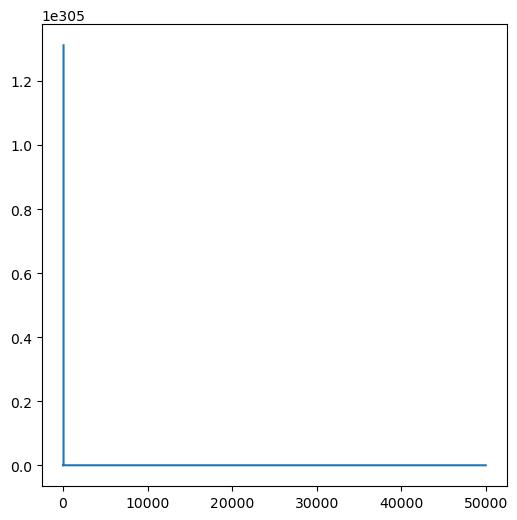

In [285]:
batch_grad(X_train,np.array(y_train).reshape(721,1),alpha=1e-4,max_iter = 50000)

iterations =  0  training error =  321267.00969354756


/Users/uttkarshjain/tensorflow-test/env/lib/python3.8/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/uttkarshjain/tensorflow-test/env/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in square
  result = func(self.values, **kwargs)


iterations =  5000  training error =  0.0
iterations =  10000  training error =  0.0
iterations =  15000  training error =  0.0
iterations =  20000  training error =  0.0
iterations =  25000  training error =  0.0
iterations =  30000  training error =  0.0
iterations =  35000  training error =  0.0
iterations =  40000  training error =  0.0
iterations =  45000  training error =  0.0


,0
Cement (component 1)(kg in a m^3 mixture),NaN
Blast Furnace Slag (component 2)(kg in a m^3 mixture),NaN
Fly Ash (component 3)(kg in a m^3 mixture),NaN
Water (component 4)(kg in a m^3 mixture),NaN
Superplasticizer (component 5)(kg in a m^3 mixture),NaN
Coarse Aggregate (component 6)(kg in a m^3 mixture),NaN
Fine Aggregate (component 7)(kg in a m^3 mixture),NaN
Age (day),NaN
bias,NaN


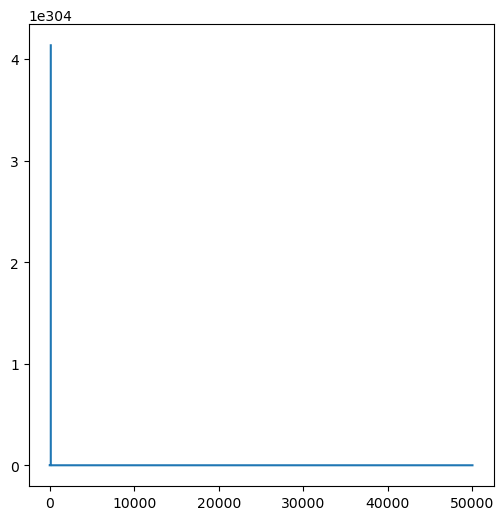

In [286]:
batch_grad(X_train,np.array(y_train).reshape(721,1),alpha=1e-5,max_iter = 50000)

iterations =  0  training error =  874.1915639266603
iterations =  5000  training error =  108.96936397366962
iterations =  10000  training error =  108.74228601860767
iterations =  15000  training error =  108.62197848692215
iterations =  20000  training error =  108.51748290920627
iterations =  25000  training error =  108.42653158386017
iterations =  30000  training error =  108.34736841270073
iterations =  35000  training error =  108.27846552288601
iterations =  40000  training error =  108.21849307200992
iterations =  45000  training error =  108.16629357949638


,0
Cement (component 1)(kg in a m^3 mixture),0.113033
Blast Furnace Slag (component 2)(kg in a m^3 mixture),0.101994
Fly Ash (component 3)(kg in a m^3 mixture),0.075847
Water (component 4)(kg in a m^3 mixture),-0.188175
Superplasticizer (component 5)(kg in a m^3 mixture),0.182837
Coarse Aggregate (component 6)(kg in a m^3 mixture),0.007689
Fine Aggregate (component 7)(kg in a m^3 mixture),0.016565
Age (day),0.113841
bias,-0.000419


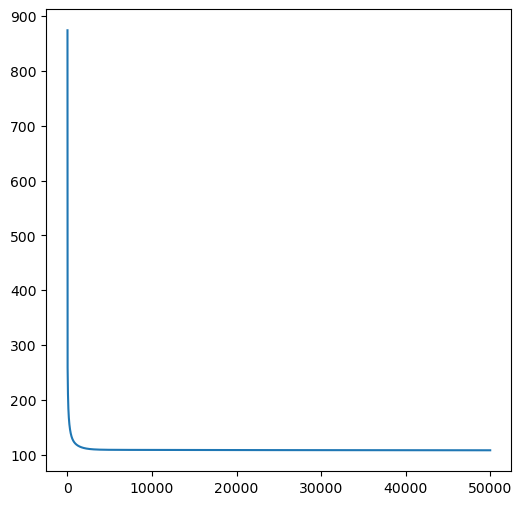

In [287]:
batch_grad(X_train,np.array(y_train).reshape(721,1),alpha=1e-6,max_iter = 50000)

iterations =  0  training error =  1190.6674184635926
iterations =  5000  training error =  132.25370567203382
iterations =  10000  training error =  119.3108580049995
iterations =  15000  training error =  114.47914963913277
iterations =  20000  training error =  112.00353101147869
iterations =  25000  training error =  110.64029797204373
iterations =  30000  training error =  109.87714204895536
iterations =  35000  training error =  109.44607640744354
iterations =  40000  training error =  109.19965309846445
iterations =  45000  training error =  109.05600958476205


,0
Cement (component 1)(kg in a m^3 mixture),0.116375
Blast Furnace Slag (component 2)(kg in a m^3 mixture),0.105276
Fly Ash (component 3)(kg in a m^3 mixture),0.083454
Water (component 4)(kg in a m^3 mixture),-0.190297
Superplasticizer (component 5)(kg in a m^3 mixture),0.053976
Coarse Aggregate (component 6)(kg in a m^3 mixture),0.005709
Fine Aggregate (component 7)(kg in a m^3 mixture),0.018596
Age (day),0.112764
bias,-0.000136


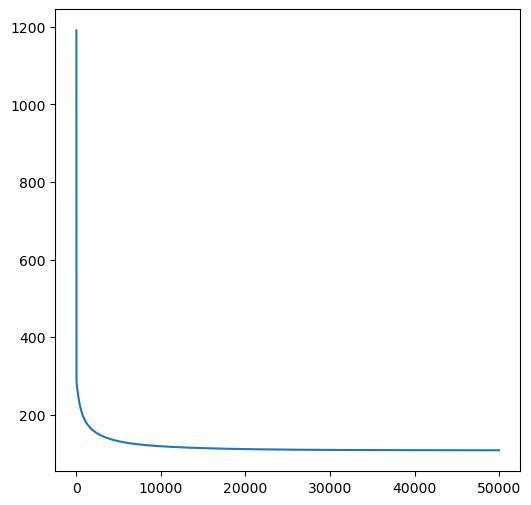

In [288]:
batch_grad(X_train,np.array(y_train).reshape(721,1),alpha=1e-7,max_iter = 50000)

iterations =  0  training error =  874.1915639266603
iterations =  5000  training error =  108.96936397366962
iterations =  10000  training error =  108.74228601860767
iterations =  15000  training error =  108.62197848692215
iterations =  20000  training error =  108.51748290920627
iterations =  25000  training error =  108.42653158386017
iterations =  30000  training error =  108.34736841270073
iterations =  35000  training error =  108.27846552288601
iterations =  40000  training error =  108.21849307200992
iterations =  45000  training error =  108.16629357949638


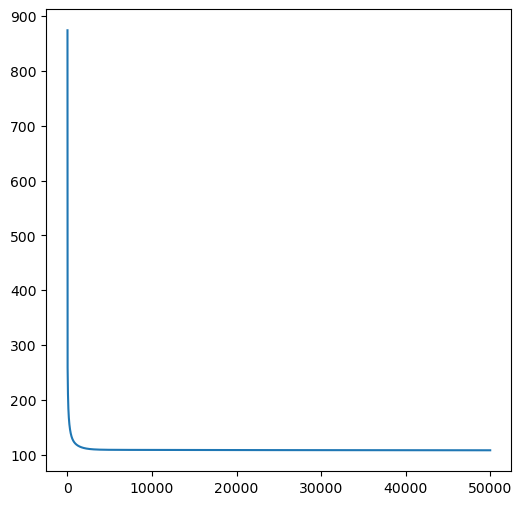

In [292]:
W_b = batch_grad(X_train,np.array(y_train).reshape(721,1),alpha=1e-6,max_iter = 50000)

In [289]:
W_b

,0
Cement (component 1)(kg in a m^3 mixture),0.113033
Blast Furnace Slag (component 2)(kg in a m^3 mixture),0.101994
Fly Ash (component 3)(kg in a m^3 mixture),0.075847
Water (component 4)(kg in a m^3 mixture),-0.188175
Superplasticizer (component 5)(kg in a m^3 mixture),0.182837
Coarse Aggregate (component 6)(kg in a m^3 mixture),0.007689
Fine Aggregate (component 7)(kg in a m^3 mixture),0.016565
Age (day),0.113841
bias,-0.000419


Here we can see the warning by python as error is overflowing in most of the learning rates , also at very low learning rate (alpha = 1e-6 or 1e-7) the gradient descent is converging . So we try with data normalization

In [290]:
r2score(W_b,X_train,y_train)

0.6165419421401972

In [291]:
r2score(W_b,X_test,y_test)

0.6025803085660668

### With data normalization

iterations =  0  training error =  1528.0299936420124
iterations =  5000  training error =  622.8511217462896
iterations =  10000  training error =  300.306922059581
iterations =  15000  training error =  183.69379162636943
iterations =  20000  training error =  140.8761408602282
iterations =  25000  training error =  124.81150180788875
iterations =  30000  training error =  118.55395802667257
iterations =  35000  training error =  115.93923569131842
iterations =  40000  training error =  114.70485305509837
iterations =  45000  training error =  114.01226422590386


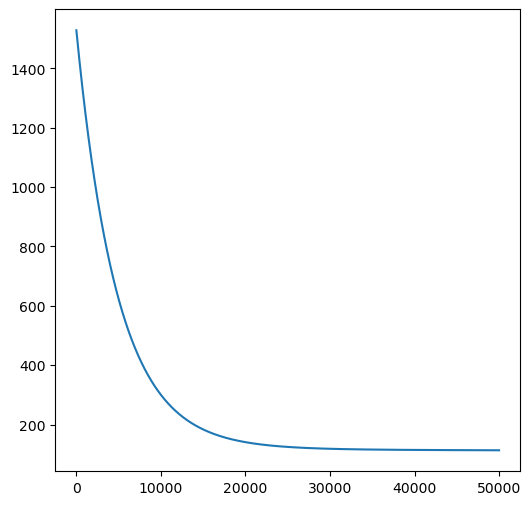

In [267]:
W_batch = batch_grad(X_train_norm,np.array(y_train).reshape(721,1),alpha=1e-4,max_iter = 50000 )

In [293]:
r2score(W_batch,X_train_norm,y_train)

0.5972992703640948

In [294]:
r2score(W_batch,X_test_norm,y_test)

0.5823161084413944

With data normalization we see that convergence takes place even at higher learning rate(1e-4) and also it doesn't give extreme results in different learning rate , only convergence is slower than the optimal learning rate

Also r2 score is less compared to without normalization in batch gradient descent but it can e improved if we increase max no of iterations

## Batch Gradient Descent using Pytorch

In [296]:
def batch_gradient_descent(X, Y, max_iter=1000, learning_rate=1e-4):
    # Convert pandas dataframe to PyTorch tensor
    X = torch.tensor(X.values, dtype=torch.float32)
    Y = torch.tensor(Y, dtype=torch.float32)

    # Initialize weights
    weights = torch.zeros(X.shape[1], dtype=torch.float32, requires_grad=True)
    bias = torch.zeros(1, dtype=torch.float32, requires_grad=True)
    mse = []
    for i in range(max_iter):
        # Compute predictions
        predictions = X @ weights + bias

        # Compute loss
        loss = torch.mean((predictions - Y) ** 2)
        mse.append(loss.item())
        if i%5000==0:
            print('iterations = ',i,'mse error = ',loss.item())

        # Compute gradients
        loss.backward()

        # Update weights
        with torch.no_grad():
            weights -= learning_rate * weights.grad
            bias -= learning_rate * bias.grad

            # Zero the gradients
            weights.grad.zero_()
            bias.grad.zero_()
    plt.figure(figsize=(6,6))
    plt.plot(np.arange(len(mse)),mse,'-')
    return weights.tolist()+[bias.item()]


iterations =  0 mse error =  1588.97119140625
iterations =  5000 mse error =  312.353515625
iterations =  10000 mse error =  142.65794372558594
iterations =  15000 mse error =  118.62361145019531
iterations =  20000 mse error =  114.46722412109375
iterations =  25000 mse error =  113.22908782958984
iterations =  30000 mse error =  112.53632354736328
iterations =  35000 mse error =  112.02058410644531
iterations =  40000 mse error =  111.60258483886719
iterations =  45000 mse error =  111.25211334228516


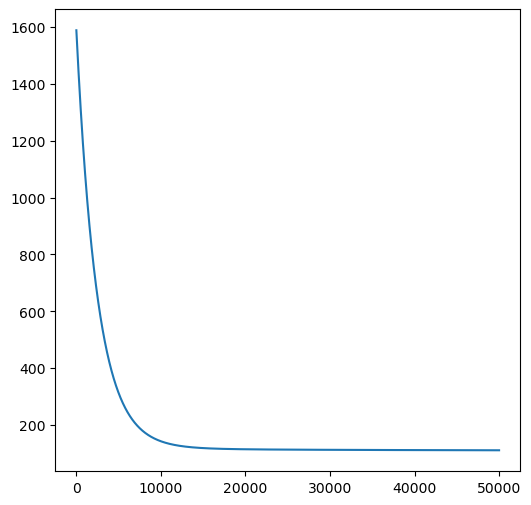

In [297]:
W_pyt_batch= batch_gradient_descent(X_train_norm,y_train,max_iter=50000,learning_rate=1e-4) 

In [298]:
r2score(W_pyt_batch,X_train_norm,y_train)

0.6065042624270778

In [299]:
r2score(W_pyt_batch,X_test_norm,y_test)

0.5931958943045291

With data normlaized and using pytorch implementation the r2 score has increased from our normal implementation of gradient descent

## Mini Batch Gradient Descent

In [300]:
def mini_batch_grad(X,Y,batch_size,threshold=1e-3, alpha = 1e-5,max_epochs = 10):
    m = X.shape[0]
    X = X.copy()
    X['bias'] = np.ones(m)
    n = X.shape[1]
    W_old = np.zeros((n,1))
    W_new = np.ones((n,1))
    epoch = 0
    mse = []
    while epoch<max_epochs:
        i = 0
        while i<m:
            if i+batch_size>=m:
                X_batch = np.array(X.iloc[i:])
                Y_batch = Y[i:]
            else:
                X_batch = np.array(X.iloc[i:i+batch_size])
                Y_batch = Y[i:i+batch_size]
            i+=batch_size
            W_old = W_new
            del_w = alpha*gradJ(W_old,X_batch,Y_batch)
            W_new = W_old-del_w
        error = mse_error(W_new,X,Y)
        mse.append(error)
        if epoch%500==0:
            print('epoch = ',epoch , 'mse training error = ',mse[-1][0])
        epoch+=1
    plt.figure(figsize=(12,9))
    plt.plot(np.arange(len(mse)),mse,'-') 
    return W_new

epoch =  0 mse training error =  1495.2714178969848
epoch =  500 mse training error =  413.67608420039306
epoch =  1000 mse training error =  180.24721894580154
epoch =  1500 mse training error =  128.67507770515334
epoch =  2000 mse training error =  116.7377332623927
epoch =  2500 mse training error =  113.57300980388459
epoch =  3000 mse training error =  112.42033366368075
epoch =  3500 mse training error =  111.78443836566993
epoch =  4000 mse training error =  111.3250795223524
epoch =  4500 mse training error =  110.95631180036375
epoch =  5000 mse training error =  110.64932067268926
epoch =  5500 mse training error =  110.38942682829989
epoch =  6000 mse training error =  110.1666346797504
epoch =  6500 mse training error =  109.97337504607749
epoch =  7000 mse training error =  109.80377237909128
epoch =  7500 mse training error =  109.65325327803143
epoch =  8000 mse training error =  109.5182608596596
epoch =  8500 mse training error =  109.39602871642897
epoch =  9000 mse 

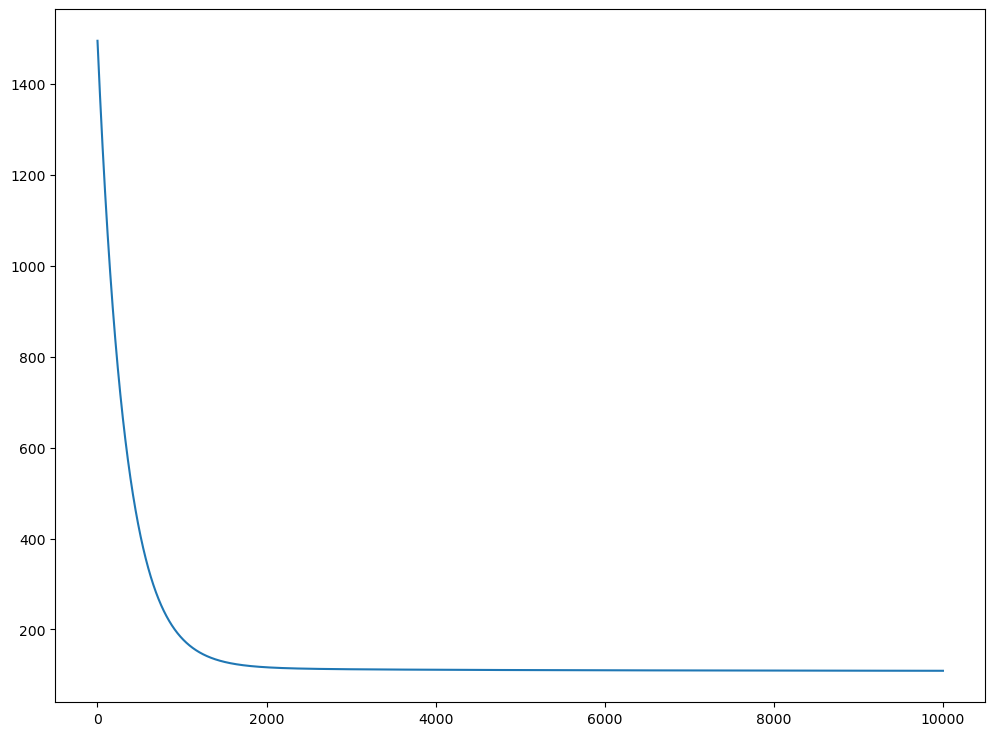

In [306]:
W_mini = mini_batch_grad(X_train_norm,np.array(y_train).reshape(-1,1),batch_size=50,alpha=1e-4,max_epochs=10000)

In [307]:
r2score(W_mini,X_train_norm,y_train)

0.613116300282147

In [308]:
r2score(W_mini,X_test_norm,y_test)

0.5974980600763224

Using mini batch grad descent with batch size 50 and 1e-4 learning rate we get the optimal result only in 10000 epochs , compared to 50,000 iterations in batch gradient descent shows the effectiveness and speed of convergence provided by mini batch gradient technique

## Mini Batch Gradient Descent using Pytorch

In [309]:
def mini_batch_gradient_descent(X, Y, learning_rate=1e-4, batch_size=50, max_epochs=5000):
    X = X.copy()
    X['bias'] = np.ones(X.shape[0])
    # Convert dataframes to tensors
    X = torch.tensor(X.values, dtype=torch.float32)
    Y = torch.tensor(Y, dtype=torch.float32)
    
    # Initialize weights with random values
    w = torch.zeros(X.shape[1], requires_grad=True)
    
    # Define the loss function
    criterion = torch.nn.MSELoss()
    
    # Define the optimizer
    optimizer = torch.optim.SGD([w], lr=learning_rate)
    
    mse = []
    
    for i in range(max_epochs):
        j = 0
        while j<X.shape[0]:
            # Get the batch data
            if j+batch_size<X.shape[0]:
                X_batch = X[j:j+batch_size, :]
                Y_batch = Y[j:j+batch_size]
            else:
                X_batch = X[j:,:]
                Y_batch = Y[j:]
            j+=batch_size
            
            # Calculate the prediction
            prediction = torch.matmul(X_batch, w)
            
            # Calculate the loss
            loss = criterion(prediction, Y_batch)
            
            # Clear the gradients
            optimizer.zero_grad()
            
            # Compute the gradients
            loss.backward()
            if i%500==0 and j+batch_size>X.shape[0]:
                print('epochs = ',i , 'mse error = ',loss.item())
            
            # Update the weights
            optimizer.step()
        mse.append(loss.item())
    
    return w.tolist()

In [310]:
W_pyt_mini = mini_batch_gradient_descent(X_train_norm,y_train,learning_rate=1e-4,batch_size=50,max_epochs=10000)

epochs =  0 mse error =  1396.064697265625
epochs =  0 mse error =  2097.776123046875
epochs =  500 mse error =  139.8358917236328
epochs =  500 mse error =  294.4385070800781
epochs =  1000 mse error =  88.10941314697266
epochs =  1000 mse error =  176.31556701660156
epochs =  1500 mse error =  87.22457122802734
epochs =  1500 mse error =  163.46302795410156
epochs =  2000 mse error =  87.74759674072266
epochs =  2000 mse error =  160.97006225585938
epochs =  2500 mse error =  88.16218566894531
epochs =  2500 mse error =  160.099853515625
epochs =  3000 mse error =  88.52822875976562
epochs =  3000 mse error =  159.58172607421875
epochs =  3500 mse error =  88.86053466796875
epochs =  3500 mse error =  159.1724853515625
epochs =  4000 mse error =  89.15949249267578
epochs =  4000 mse error =  158.8154754638672
epochs =  4500 mse error =  89.42613983154297
epochs =  4500 mse error =  158.4886016845703
epochs =  5000 mse error =  89.6642837524414
epochs =  5000 mse error =  158.19041442

In [312]:
r2score(W_pyt_mini,X_train_norm,y_train)

0.6158840327939503

In [313]:
r2score(W_pyt_mini,X_test_norm,y_test)

0.5992931991327615

Here also we see improved results compared to previous batch gradient descent by pytorch , also the time taken y pytorch implementation is very optimized and it completest iteration way faster than numpy array implementation.

## Stochastic Gradient Descent

epoch =  0 mse training error =  1310.4529854493658
epoch =  500 mse training error =  107.75056750240377
epoch =  1000 mse training error =  107.31401684123625
epoch =  1500 mse training error =  107.2655358042268
epoch =  2000 mse training error =  107.26008978407374
epoch =  2500 mse training error =  107.25945773821914
epoch =  3000 mse training error =  107.25937776078491
epoch =  3500 mse training error =  107.2593655459587


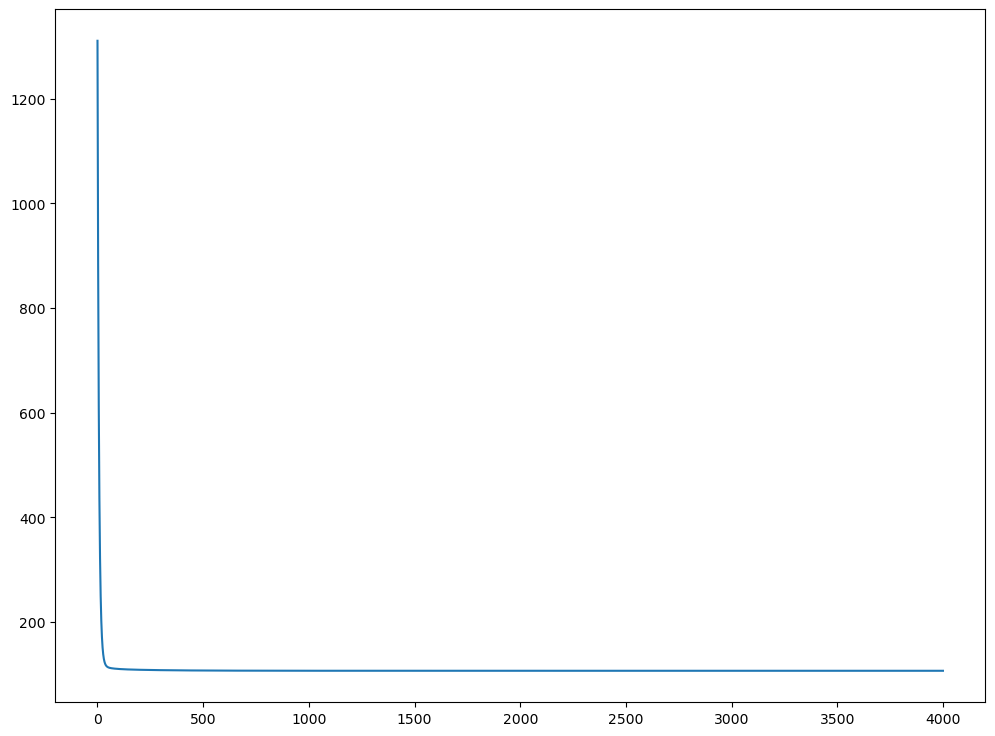

In [114]:
W_stochastic = mini_batch_grad(X_train_norm,np.array(y_train).reshape(-1,1),batch_size=1,alpha=1e-4,max_epochs=4000)

In [115]:
r2score(W_stochastic,X_train_norm,y_train)

0.6195973285172969

## Stochastic Gradient Descent using Pytorch

In [211]:
W_pyt_mini = mini_batch_gradient_descent(X_train_norm,y_train,learning_rate=1e-4,batch_size=1,max_epochs=4000)

epochs =  0 mse error =  1092.486328125
epochs =  500 mse error =  3.54606032371521
epochs =  1000 mse error =  4.820384979248047
epochs =  1500 mse error =  4.972319602966309
epochs =  2000 mse error =  4.989329814910889
epochs =  2500 mse error =  4.991459846496582
epochs =  3000 mse error =  4.991459846496582
epochs =  3500 mse error =  4.991459846496582


Stochastic gradient Descent is implemented using same code by putting batch size = 1 . The results have improved but 4000 epochs takes a lot of time compared to other techniques and given this much time mini batch can complete many iterations and give almost similar result as well 

## Momentum Gradient Descent

In [315]:
def momentum_grad(X,Y,beta=1e-4,alpha=1e-4,max_iter = 1000):
    m = X.shape[0]
    X = X.copy()
    X['bias'] = np.ones(m)
    n = X.shape[1]
    W_old = np.zeros((n,1))
    W_new = np.ones((n,1))
    del_w = W_new - W_old
    mse = []
    iterations = 0
    while (iterations<max_iter):
        W_old = W_new
        del_w = alpha*gradJ(W_old,X,Y)+beta*del_w
        W_new = W_old-del_w
        #print(W_new)
        error = mse_error(W_new,X,Y)
        mse.append(error)
        if iterations%5000==0:
            print('iterations = ',iterations,' mse error = ',mse[-1][0])
        #print('del_w^2 = ',np.linalg.norm(del_w)) 
        iterations+=1
    plt.figure(figsize=(12,9))
    plt.plot(np.arange(len(mse)),mse,'-')
    return W_new
    

iterations =  0  mse error =  1500.1175520104382
iterations =  5000  mse error =  612.8997336232673
iterations =  10000  mse error =  295.64919135033085
iterations =  15000  mse error =  180.93328965718038
iterations =  20000  mse error =  138.88612932619645
iterations =  25000  mse error =  123.13375717092738
iterations =  30000  mse error =  116.98506466565846
iterations =  35000  mse error =  114.39152248944042
iterations =  40000  mse error =  113.14578519450261
iterations =  45000  mse error =  112.43473609902941


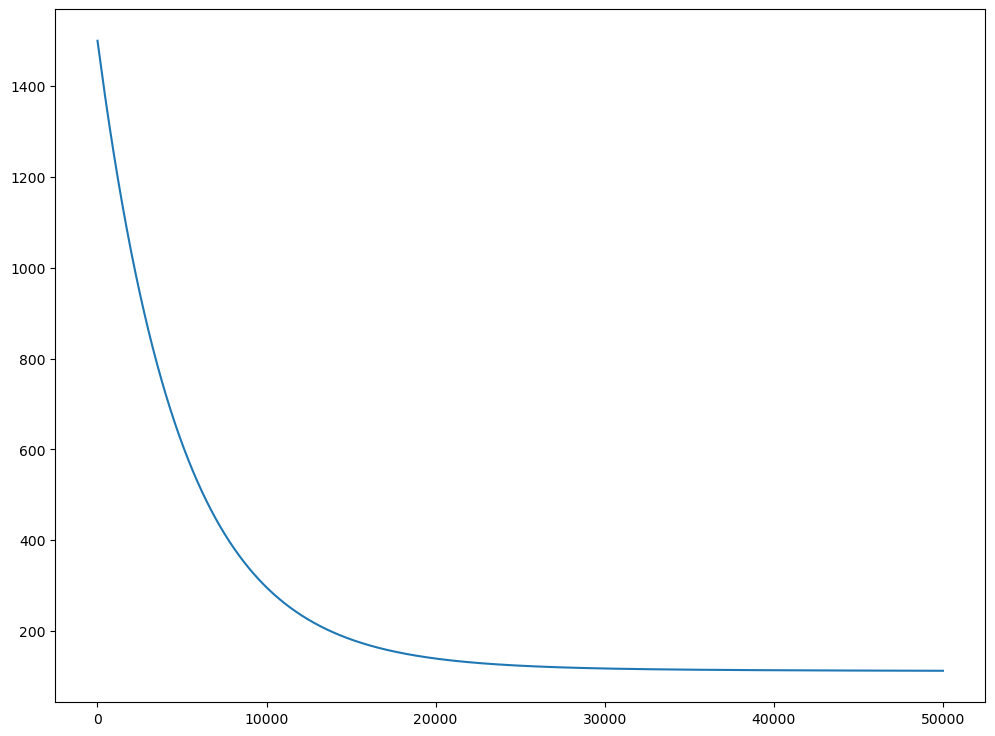

In [316]:
W_momentum = momentum_grad(X_train_norm,np.array(y_train).reshape(-1,1),beta=1e-2,alpha = 1e-4,max_iter = 50000)

In [317]:
r2score(W_momentum,X_train_norm,y_train)

0.6029466454789019

In [323]:
r2score(W_momentum,X_test_norm,y_test)

0.5819783804203897

As i have not used mini batch gradient descent here with momentum gradient descent , so without increasing no of iterations we can't compare results with mini batch . But if we compare it with standard batch gradient descent the r2 score have improved with same no of iterations

## Momentum Gradient Descent using Pytorch

In [319]:
def batch_momentum_gradient_descent(X, Y, alpha, max_iterations, beta):
    X = X.copy()
    X['bias'] = np.ones(X.shape[0])
    # Convert dataframes to tensors
    X = torch.tensor(X.values, dtype=torch.float32)
    Y = torch.tensor(Y, dtype=torch.float32)
    
    # Initialize weights with random values
    w = torch.randn(X.shape[1], requires_grad=True)
    
    # Define the loss function
    criterion = torch.nn.MSELoss()
    
    # Define the optimizer
    optimizer = torch.optim.SGD([w], lr=alpha, momentum=beta)
    
    mse = []
    for i in range(max_iterations):
        # Calculate the prediction
        prediction = torch.matmul(X, w)
        
        # Calculate the loss
        loss = criterion(prediction, Y)
        
        # Clear the gradients
        optimizer.zero_grad()
        
        # Compute the gradients
        loss.backward()
        
        mse.append(loss.item())
        
        if i%5000==0:
            print('iterations = ',i,'mse error = ',loss.item())
        
        # Update the weights
        optimizer.step()
    
    plt.figure(figsize=(6,6))
    plt.plot(np.arange(len(mse)),mse)
    
    return w.tolist()


iterations =  0 mse error =  1598.30029296875
iterations =  5000 mse error =  306.63446044921875
iterations =  10000 mse error =  139.90435791015625
iterations =  15000 mse error =  117.06440734863281
iterations =  20000 mse error =  113.3666763305664
iterations =  25000 mse error =  112.37071228027344
iterations =  30000 mse error =  111.8368148803711
iterations =  35000 mse error =  111.43463897705078
iterations =  40000 mse error =  111.10050964355469
iterations =  45000 mse error =  110.81332397460938


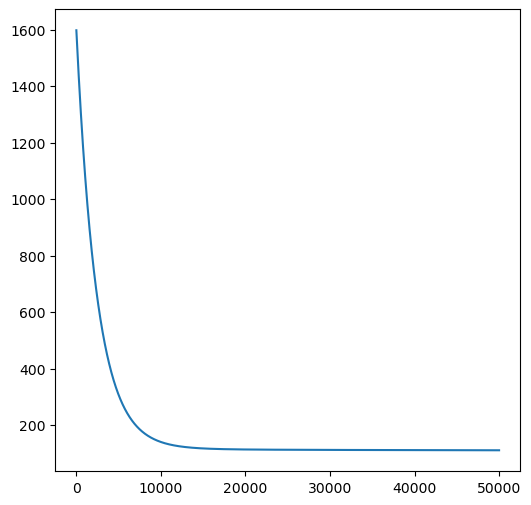

In [320]:
W_pyt_momentum = batch_momentum_gradient_descent(X_train_norm,y_train,alpha=1e-4,max_iterations = 50000,beta = 1e-2)

In [321]:
r2score(W_pyt_momentum,X_train_norm,y_train)

0.6078872230354253

In [322]:
r2score(W_pyt_momentum,X_test_norm,y_test)

0.5948001285722357

## Nesterov Gradient Descent

In [325]:
def nesterov_grad(X,Y,beta = 1e-4,alpha = 1e-4,max_iter = 1000):
    m = X.shape[0]
    X = X.copy()
    X['bias'] = np.ones(m)
    n = X.shape[1]
    W_old = np.zeros((n,1))
    W_new = np.ones((n,1))
    del_w = W_new - W_old
    mse = []
    iterations = 0
    delw_old = del_w
    delw_tilda = del_w
    while (iterations<max_iter):
        W_old = W_new
        delw_old = del_w
        delw_tilda = beta*delw_old
        W_old = W_old - delw_tilda
        del_w = alpha*gradJ(W_old,X,Y)+delw_tilda
        W_new = W_old-del_w
        #print(W_new)
        error = mse_error(W_new,X,Y)
        mse.append(error)
        if iterations%5000==0:
            print('iterations = ',iterations,' mse error = ',mse[-1][0])
        #print('del_w^2 = ',np.linalg.norm(del_w)) 
        iterations+=1
    plt.figure(figsize=(12,9))
    plt.plot(np.arange(len(mse)),mse,'-')
    return W_new
    

iterations =  0  mse error =  1500.9872958428073
iterations =  5000  mse error =  608.1778007207585
iterations =  10000  mse error =  292.15926847306497
iterations =  15000  mse error =  179.01994569251627
iterations =  20000  mse error =  137.94506191375953
iterations =  25000  mse error =  122.68985554641517
iterations =  30000  mse error =  116.77462138909111
iterations =  35000  mse error =  114.28588445410061
iterations =  40000  mse error =  113.08627163149309
iterations =  45000  mse error =  112.39564972064659


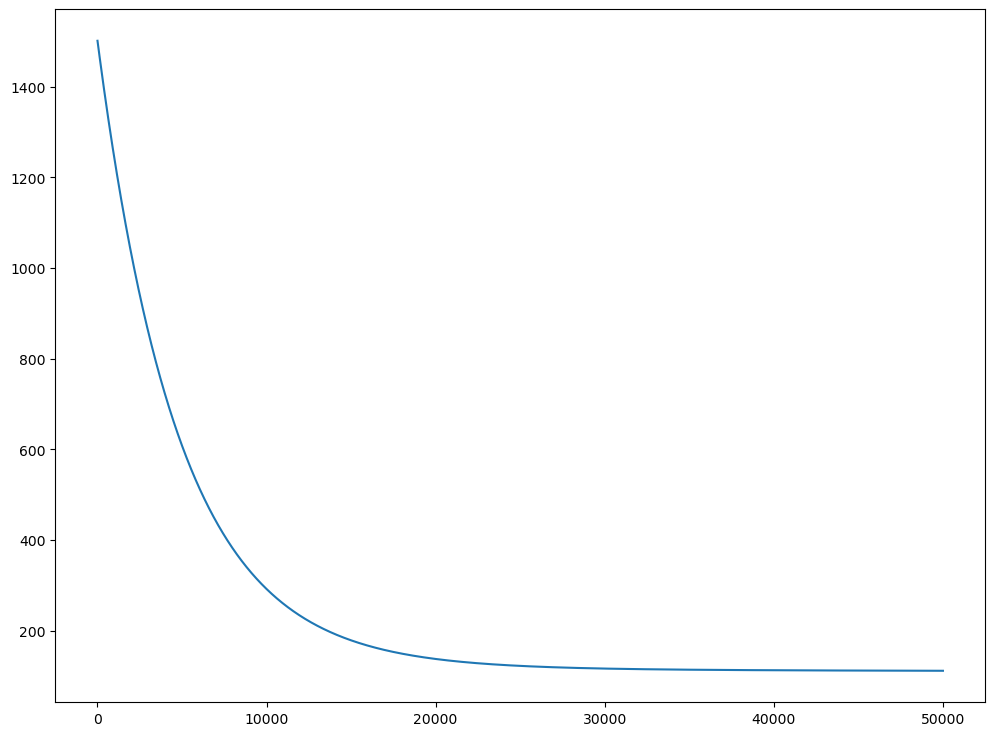

In [326]:
W_nest = nesterov_grad(X_train_norm,np.array(y_train).reshape(-1,1),beta=1e-2,alpha = 1e-4,max_iter = 50000)

In [327]:
r2score(W_nest,X_train_norm,y_train)

0.603051735310854

In [328]:
r2score(W_nest,X_test_norm,y_test)

0.5821898380570756

With Nesterov Grad we see a slight improvement in r2 score and also MSE loss after same no of iterations , also we can see there is a difference in r2 score with pytorch implementation using tensor when compared to numpy arrays ,  so pytorch maybe is using a much better optimizer 

## Nesterov Gradient Descent using Pytorch

In [207]:
def nesterov_batch_gradient_descent(X, Y, alpha, max_iterations, beta):
    X = X.copy()
    X['bias'] = np.ones(X.shape[0])
    # Convert dataframes to tensors
    X = torch.tensor(X.values, dtype=torch.float32)
    Y = torch.tensor(Y, dtype=torch.float32)
    
    # Initialize weights with random values
    w = torch.randn(X.shape[1], requires_grad=True)
    
    # Define the loss function
    criterion = torch.nn.MSELoss()
    
    # Define the optimizer
    optimizer = torch.optim.SGD([w], lr=alpha, momentum=beta , nesterov=True)
    
    mse = []
    for i in range(max_iterations):
        # Calculate the prediction
        prediction = torch.matmul(X, w)
        
        # Calculate the loss
        loss = criterion(prediction, Y)
        
        # Clear the gradients
        optimizer.zero_grad()
        
        # Compute the gradients
        loss.backward()
        
        mse.append(loss.item())
        
        if i%1000==0:
            print('iterations = ',i,'mse error = ',loss.item())
        
        # Update the weights
        optimizer.step()
    
    plt.figure(figsize=(6,6))
    plt.plot(np.arange(len(mse)),mse)
    
    return w.tolist()
    

iterations =  0 mse error =  1624.6295166015625
iterations =  1000 mse error =  1113.88623046875
iterations =  2000 mse error =  777.3305053710938
iterations =  3000 mse error =  555.0656127929688
iterations =  4000 mse error =  407.978759765625
iterations =  5000 mse error =  310.4522705078125
iterations =  6000 mse error =  245.66090393066406
iterations =  7000 mse error =  202.53070068359375
iterations =  8000 mse error =  173.7568359375
iterations =  9000 mse error =  154.51205444335938
iterations =  10000 mse error =  141.6017303466797
iterations =  11000 mse error =  132.90814208984375
iterations =  12000 mse error =  127.02600860595703
iterations =  13000 mse error =  123.0212173461914
iterations =  14000 mse error =  120.27230834960938
iterations =  15000 mse error =  118.36520385742188
iterations =  16000 mse error =  117.02392578125
iterations =  17000 mse error =  116.06417083740234
iterations =  18000 mse error =  115.3625717163086
iterations =  19000 mse error =  114.83678

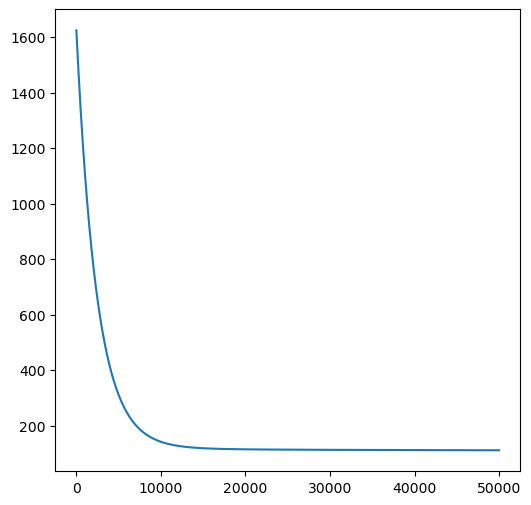

In [208]:
W_pyt_nest = nesterov_batch_gradient_descent(X_train_norm,y_train,alpha = 1e-4,max_iterations=50000,beta = 1e-2)

In [209]:
r2score(W_pyt_nest,X_train_norm,y_train)

0.6062370595322248

In [210]:
r2score(W_pyt_nest,X_test_norm,y_test)

0.5934048972164938

## Conclusion

## We see in Batch gradient Descent techniques 

Nesterov > Momentum > Batch Gradient Descent (in terms of MSE loss and R2 score)

## In Mini Batch gradient descent techniques

Stochastic > Mini batch (batch size = 50) \* but the catch is the time taken was lower by mini batch so there is that compromise in time vs optimization